# This repository aims to test HLS color space to detect lane lines
**Author:** Marcelo Garcia

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


In [10]:
# TODO: Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255), channel='sat'):
    # 1) Convert to HLS color space
    hls_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if channel == 'hue':
        ch = hls_img[:,:,0]
    elif channel == 'light':
        ch = hls_img[:,:,1]
    elif channel == 'sat':
        ch = hls_img[:,:,2]
       
    # 2) Get threshold index of the selected channel (ch)
    mask_ind = (ch >= thresh[0]) & (ch <= thresh[1])
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(ch)
    binary_output[mask_ind] = 1
    return binary_output

## Expected output
![](hls-binary.jpg)

## Testing HSL function

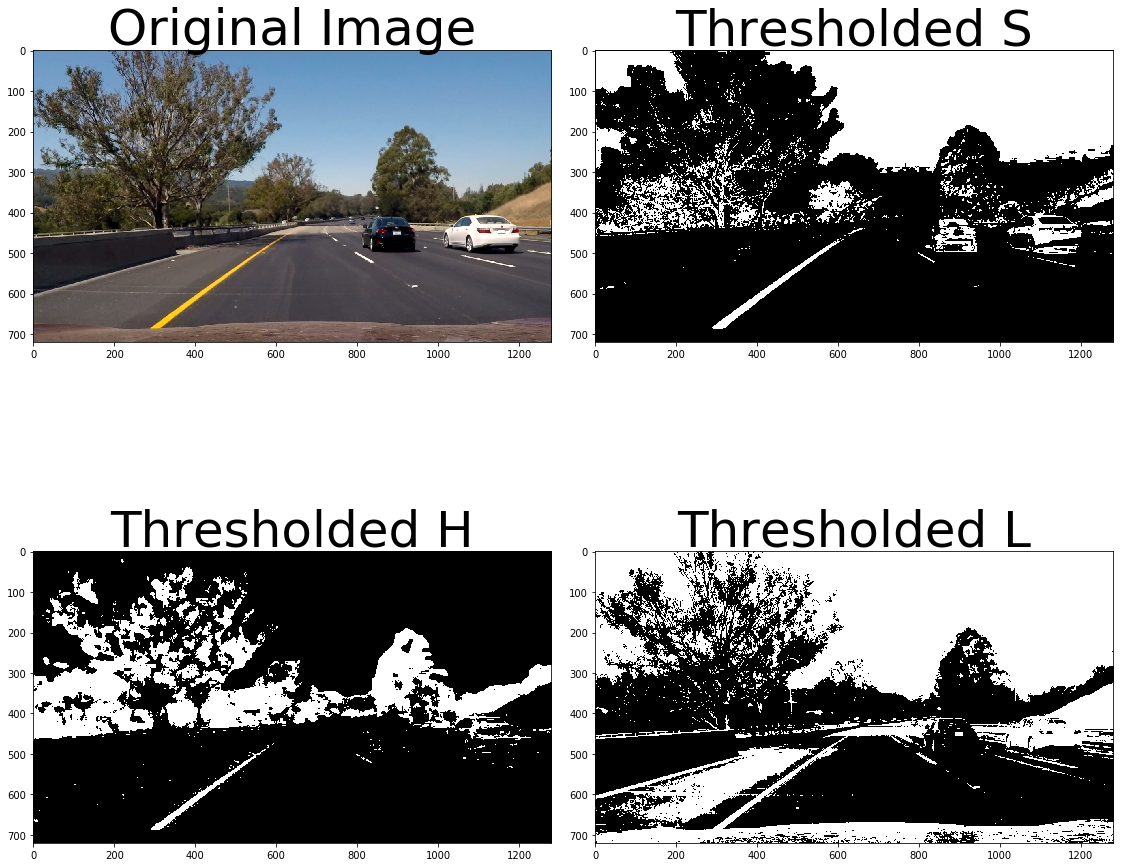

In [34]:
# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('test6.jpg') 
    
# Threshold to try to match the above image!    
hls_binary_sat       = hls_select(image, thresh=(90, 255))
hls_binary_hue       = hls_select(image, thresh=(20, 70), channel='hue')
hls_binary_lightness = hls_select(image, thresh=(90, 255), channel='light')

# Plot the result
f, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(15, 15))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(hls_binary_sat, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)

ax3.imshow(hls_binary_hue, cmap='gray')
ax3.set_title('Thresholded H', fontsize=50)

ax4.imshow(hls_binary_lightness, cmap='gray')
ax4.set_title('Thresholded L', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

**Conclusion: ** From above we can tell that H and S channels behave pretty well to identify the yellow lines. The Saturation channel also picks up the other lane lines which demonstrates its robustness against light and color changes on the road.